### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset and Examining It

In [4]:
data = pd.read_csv('/Users/Gavin/Desktop/World_Happiness_2015_2017_.csv')
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


As you can see, the dataset that we will be working with contains various countries, each ranked by their "happiness score". It also contains information such as GDP per capita, life expectancy, "freedom score", and more.

Note:

$Happiness Score = GDP + Family + Health + Freedom + Trust + Generosity + DystopiaResidual$

### Cleaning the Data

We are going to change some of the types of data in the CSV. We will also try and omit null values.

In [5]:
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [7]:
data['Year']=data['Year'].astype('float')
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

Now we need to check for null or NaN values in the data:

In [8]:
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

The line of code above returns the sum of all the null entries in each category. Luckily, this dataset has no null entries, so we do not need to clean anything.

### Pair Plot of Data

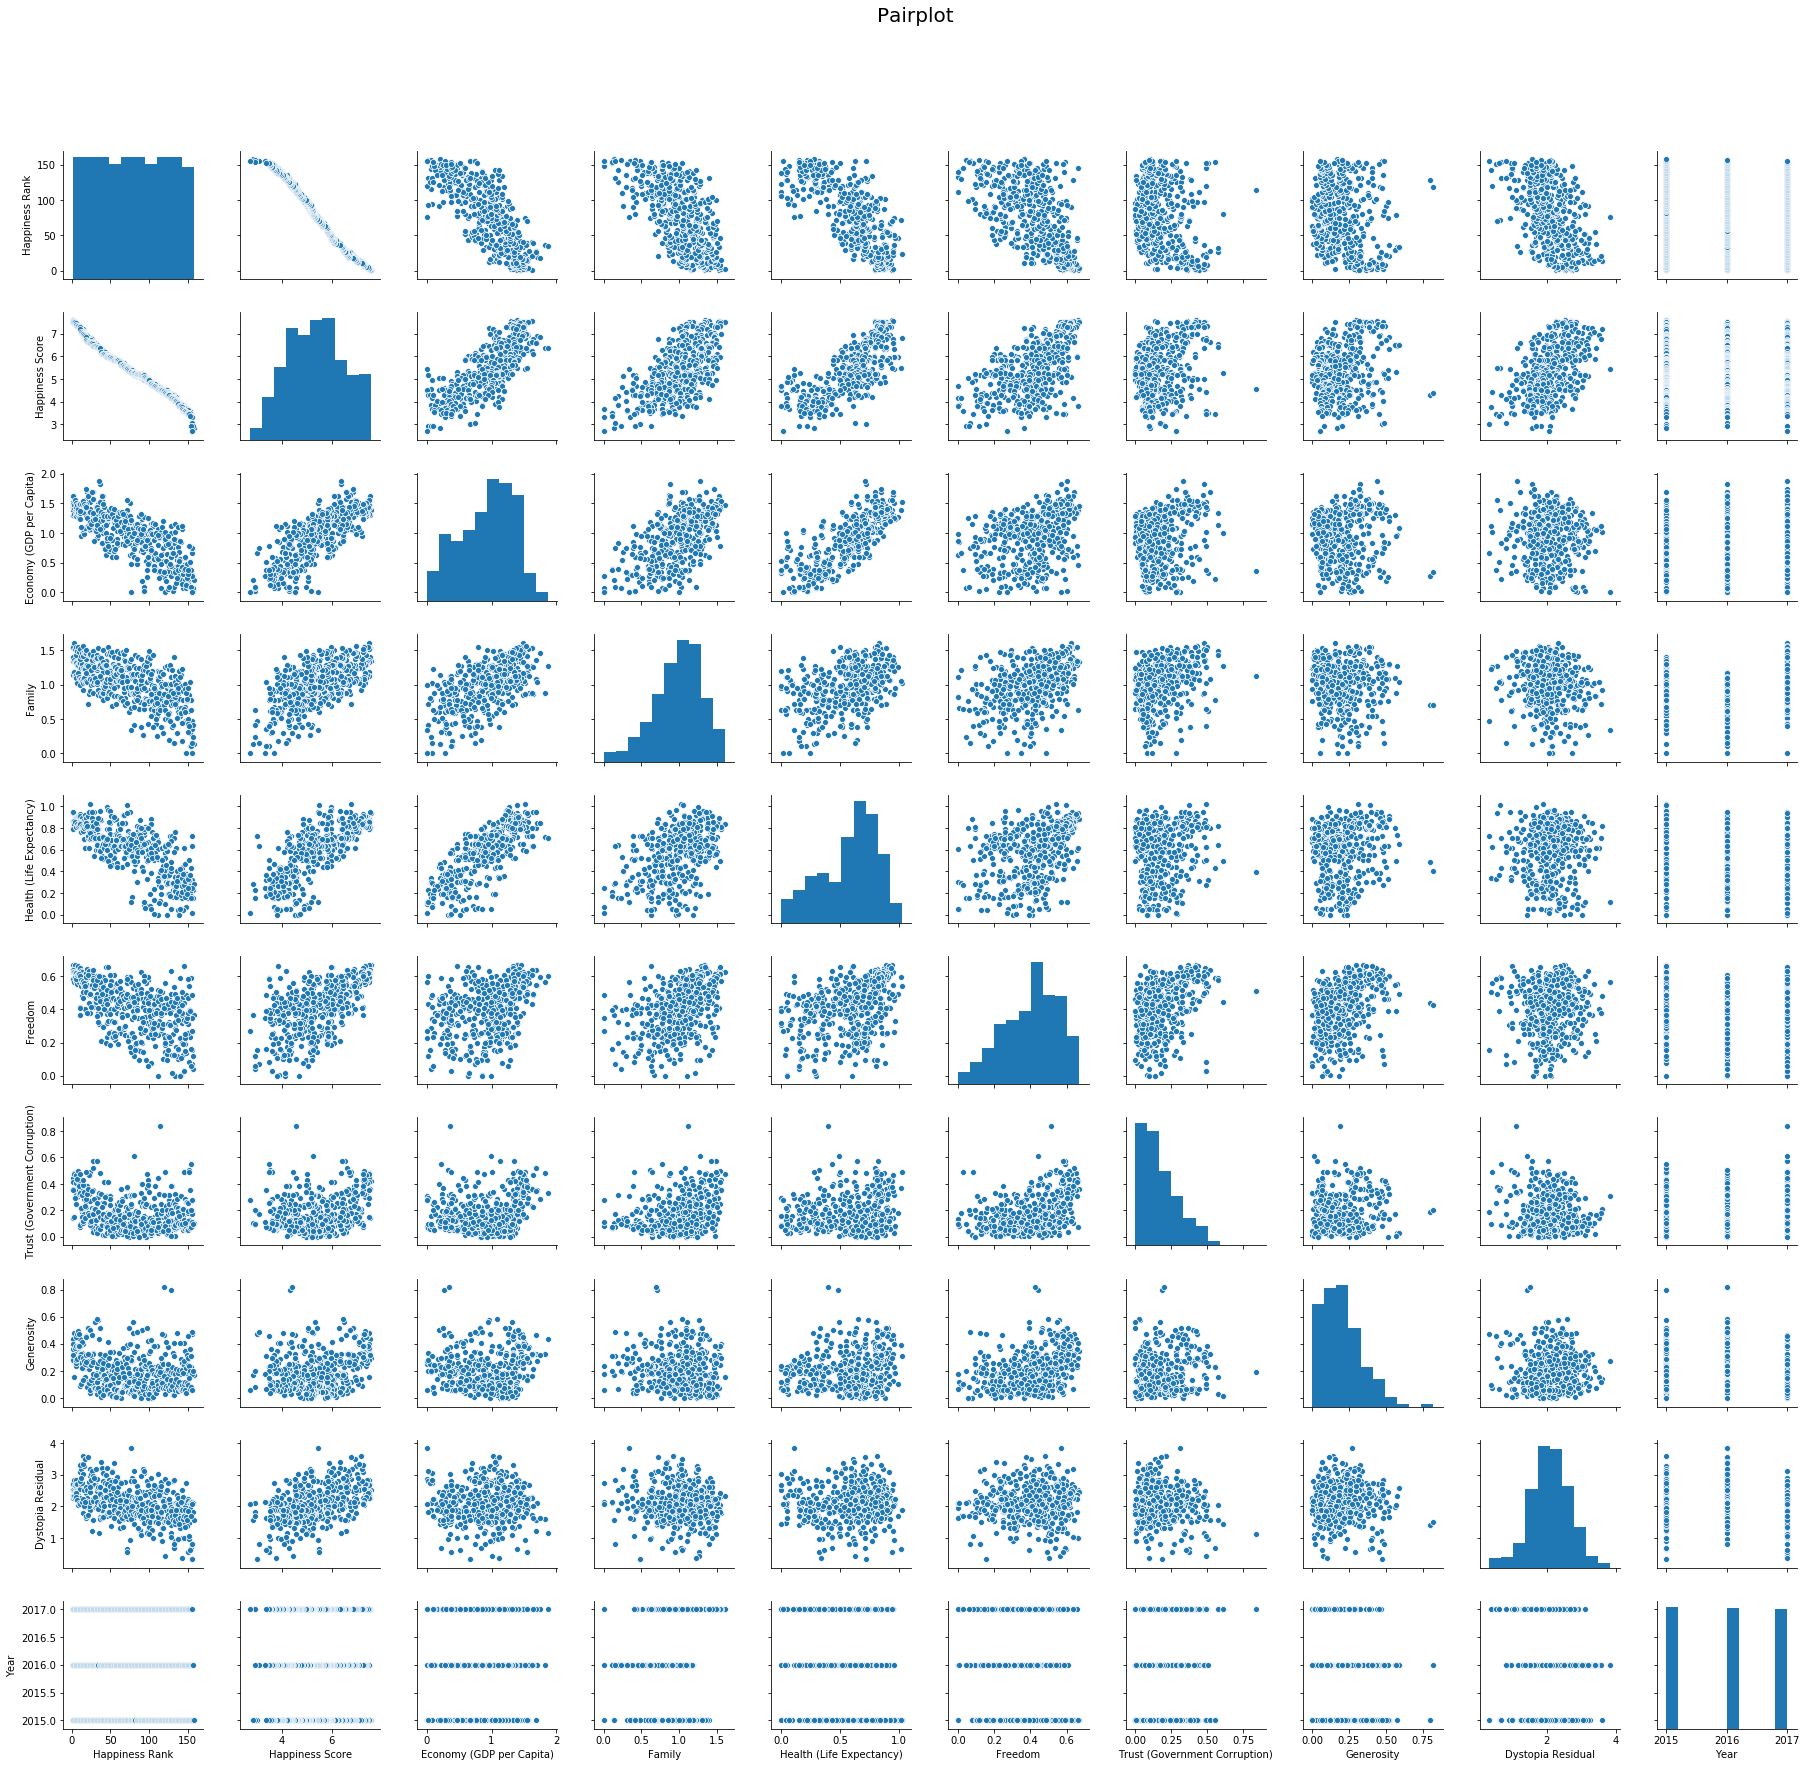

In [13]:
pairplot = sns.pairplot(data)
pairplot.fig.suptitle("Pairplot",fontsize=20)
pairplot.fig.subplots_adjust(top=0.9)

Although the pairplot is pretty complex, the general idea is to see which pair of variables appear to be correlated to one another. Just from scanning the plot, we can see that GDP per capita appears to have a positive correlation with both happiness score and life expectancy. Happiness score also appears to have a positive correlation with life expectancy. 

We are going to focus on how happiness score relates to both GDP per capita and life expectancy. 

### Exploring the Correlation Between Hapiness Score, GDP, and Life Expectancy

We will use $R^2$ correlation coefficient.

In [14]:
correlation_list = ['Happiness Score','Economy (GDP per Capita)']
correlation_df = data[correlation_list]
correlation_df.corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.00000,0.78545
Economy (GDP per Capita),0.78545,1.00000


Since $R=0.78545$, $R^2=(0.78545)^2=0.6169$. Therefore, roughly $61.69$% of the variation in happiness score can be explained by GDP per capita (and vice versa). 

We can explore this correlation further with a correlation graph:

Text(0.5, 1.0, 'The Relationship Between Happiness Score & GDP')

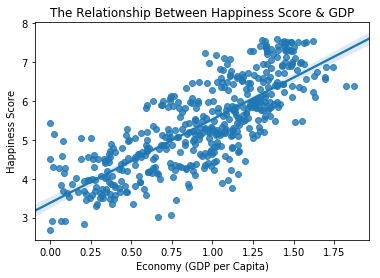

In [15]:
sns.regplot(data=correlation_df, x='Economy (GDP per Capita)',y='Happiness Score').set_title(
    'The Relationship Between Happiness Score & GDP')

### Using $R^2$ Broadly to Find Correlation Between Other Variables

We are going to do what we did for happiness score & GDP but apply it to the rest of the variables in the dataset.

In [16]:
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015.0


In [19]:
gen_corr_list = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom',
                'Trust (Government Corruption)','Generosity','Dystopia Residual']

gen_corr_df = data[gen_corr_list]
r=gen_corr_df.corr()
r_squared_gen = r**2
r_squared_gen


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.616931,0.405173,0.559564,0.313996,0.079597,0.049144,0.239852
Economy (GDP per Capita),0.616931,1.000000,0.342751,0.627619,0.118999,0.040343,0.001553,0.000905
Family,0.405173,0.342751,1.000000,0.236568,0.180945,0.083965,0.006977,0.006648
Health (Life Expectancy),0.559564,0.627619,0.236568,1.000000,0.129288,0.018485,0.026061,0.003326
Freedom,0.313996,0.118999,0.180945,0.129288,1.000000,0.164750,0.120375,0.001476
Trust (Government Corruption),0.079597,0.040343,0.083965,0.018485,0.164750,1.000000,0.007122,0.026369
Generosity,0.049144,0.001553,0.006977,0.026061,0.120375,0.007122,1.000000,0.002282
Dystopia Residual,0.239852,0.000905,0.006648,0.003326,0.001476,0.026369,0.002282,1.000000


Now we have a chart that contains all the $R^2$ values for all the other predictor variables. 

Lets take a look at the pairs that have the highest correlation and graph them. These pairs are:

- Family & Happiness Score ($R^2=0.405173$)

- Life Expectancy & GDP ($R^2=0.627619$)


### Correlation Graph 1: Family & Happiness Score

Text(0.5, 1.0, 'Relationship Between Family & Happiness Score')

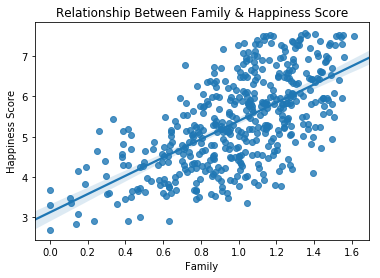

In [21]:
family_happiness = ['Happiness Score','Family']
family_happiness_df = data[family_happiness]
sns.regplot(data=family_happiness_df,x='Family',y='Happiness Score').set_title('Relationship Between Family & Happiness Score')

### Correlation Graph 2 : Life Expectancy & GDP

Text(0.5, 1.0, 'Relationship Between Life Expectancy & GDP per Capita')

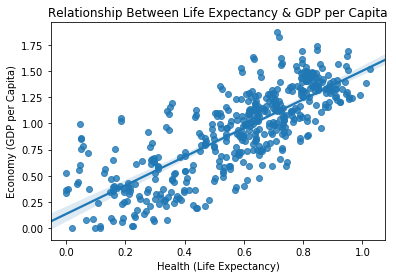

In [22]:
health_gdp = ['Health (Life Expectancy)','Economy (GDP per Capita)']
health_gdp_df = data[health_gdp]
sns.regplot(data=health_gdp_df,x='Health (Life Expectancy)',y='Economy (GDP per Capita)').set_title('Relationship Between Life Expectancy & GDP per Capita')